# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

/Users/celia/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [3]:
#Read in data from source 
admission = pd.read_csv("../assets/admissions.csv")
admission.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
# checking total observations
admission.shape

(400, 4)

In [5]:
# checking the total value counts for each field
admission.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [6]:
# checking field types
admission.dtypes

admit         int64
gre         float64
gpa         float64
prestige    float64
dtype: object

In [7]:
# checking total missing records
admission.dropna().count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [8]:
# checking missing data of gre
admission[admission['gre'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [9]:
# checking missing data of gpa
admission[admission['gpa'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


In [10]:
# checking missing data of prestige
admission[admission['prestige'].isnull()]

,admit,gre,gpa,prestige
236,1,660.0,NaN,NaN


Answer: There are 400 observations in total with three value-mission data points. Two observations miss GRE values; two observations miss GPA values; one record miss prestige information. 

#### Question 2. Create a summary table

In [11]:
# create a table of descriptive statistics for each variable 
admission.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [12]:
admission.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

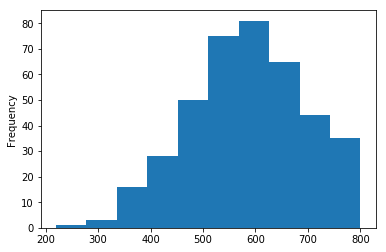

In [13]:
f=admission['gre'].plot(kind='hist')

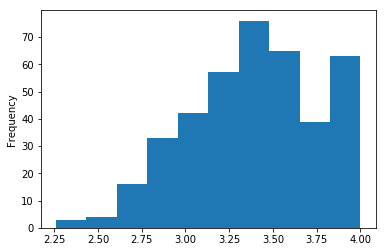

In [14]:
f=admission['gpa'].plot(kind='hist')

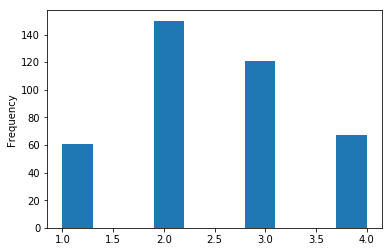

In [15]:
f=admission['prestige'].plot(kind='hist')

#### Question 3. Why would GRE have a larger STD than GPA?

In [16]:
admission.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

Answer: From the descriptive summary and histogram charts we can see that the scale of GRE values is much higher than the scale of GPA values while the range of GRE values is wider (the spread= 580) than that of GPA values (the spread = 1.74). So the accumuation total of the squared difference between each observation and the mean for GRE is much higher than that of GPA. 

#### Question 4. Drop data points with missing data


In [17]:
admission_value = admission.dropna()
admission_value.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [33]:
## Nico's answer 
# addmission_value.isnull().count() will count the number of false value that will be 397
admission_value[admission_value.isnull()].count()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: After dropping missing value data, I counted the number of null values to confirm. 

#### Question 6. Create box plots for GRE and GPA

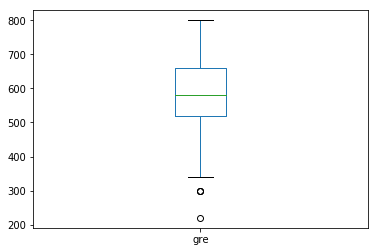

In [71]:
# box plot for GRE
f=admission_value['gre'].plot(kind='box')

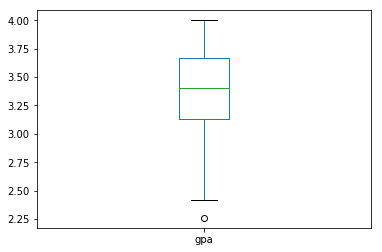

In [72]:
# box plot for GPA
f=admission_value['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: it summarizes key distribution measures: median (the middle line), first quartile (bottom of the box), third quartile (top of the box), minimum value (bottom line), maximum value (top line), outliers (circles outside of the box)

#### Question 8. Describe each distribution 

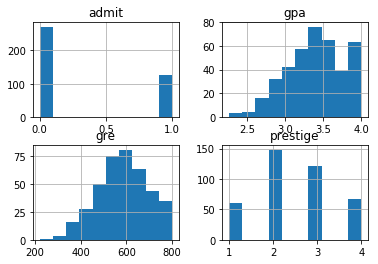

In [74]:
# plot the distribution of each variable 
f=admission_value.hist()

Answer:
    admit: it is a Bernoulli distribution with values falling into either 1 or 0;
    gre and gpa: both have mean, median and mode values. The mean is lower than the mode. 
        So both distributions are right-skewed
    prestige: it is a distribution based on categorial values 1-4

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, as explained as above

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: It is slight skewed but so far I don't think it needs correction. 

#### Question 11. Which of our variables are potentially colinear? 

In [76]:
# create a correlation matrix for the data
admission.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


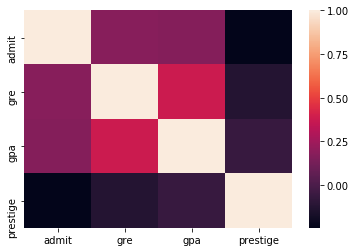

In [78]:
import seaborn as ab
f=sb.heatmap(admission_value.corr())

#### Question 12. What did you find?

Answer: The correlation values look low so the colinearity should not be a concern. I would like to test VIF value but unfortunately I don't know how to get VIF value through Python. Will check it back when I learn more later. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. Create a linear regression setting grad school admission rate as response variable and prestige of undergraduate school as predictor. The model could be:
Admission rate (y) = alpha + beta * prestige (x)
2. Sample reasonable size of data and run the model
3. Check the outcomes like coefficient (trend), p-value (coefficient significance), R-square value (explanatory power), confidence interval (range to include the mean of resopnse variable values), precision interval (range to include some specific response value), residual....

In [36]:
#??? why pivot table function does not work?
# frequency on admission by presitage
#pd.pivot_table(admission_value,values=['admit'],index =['admit'],columns=['prestige'],aggfunc=sum)
pd.crosstab(admission_value['admit'],admission_value['prestige'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


In [95]:
# Just A try to run OLS model to support the above the plan. Will run more complicated regression models like log later 
Y=admission_value['admit']
X=admission_value['prestige']
X=sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 05 Dec 2017   Prob (F-statistic):           9.02e-07
Time:                        18:02:36   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6157      0.064      9.630      0.0

From the above the results summary,
1. The coefficient of prestige is -0.1199 with p-value < 0.05, meaning that the coefficient is significant to reject the null hypothesis - no association between prestige and admission. Since the coefficient is negative, that supports that the lower value of the prestigae (higher rank) is associated with the admission
2. R-squared is just 5.9% that looks very low. It represent that the explanatory power of prestige variable in the variability of the response admission variable is weak though it is significantly associated between these two. In other words, the precision level is not high. 

I think I need to fix this model when I learn more about Python programming based scripts to run a more reasonable statistical model. 

#### Question 14. What is your hypothesis? 

Answer: The students who came from the higher rank of undergraduate schools are more likely to be admitted into the graduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data